##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Classificazione base: Classifica immagini di capi d'abbigliamento

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />Visualizza su TensorFlow.org</a>
  </td>
  <td>
<a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/it/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Esegui in Google Colab</a>
  </td>
  <td>
<a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/it/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Visualizza il sorgente su GitHub</a>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/it/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Scarica il notebook</a>
  </td>
</table>

Note: La nostra comunità di Tensorflow ha tradotto questi documenti. Poichè queste traduzioni sono *best-effort*, non è garantito che rispecchino in maniera precisa e aggiornata la [documentazione ufficiale in inglese](https://www.tensorflow.org/?hl=en). 
Se avete suggerimenti per migliorare questa traduzione, mandate per favore una pull request al repository Github [tensorflow/docs](https://github.com/tensorflow/docs). 
Per proporsi come volontari alla scrittura o alla review delle traduzioni della comunità contattate la 
[mailing list docs@tensorflow.org](https://groups.google.com/a/tensorflow.org/forum/#!forum/docs).

Questa guida allena un modello di rete neurale a classificare immagini di capi d'abbigliamento, come scarpe da ginnastica e magliette. E' normale che tu non comprenda tutti i dettagli; questa è una panoramica rapidissima di un programma completo TensorFlow con i dettagli spiegati durante il percorso.

Questa guida usa [tf.keras](https://www.tensorflow.org/guide/keras), un'API di alto livello per costruire ed addestrare modelli in TensorFlow.

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## Importare il dataset Fashion MNIST

Questa guida usa il dataset [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) che contiene 70,000 immagini in toni di grigio di 10 categorie. Le immagini mostrano singoli articoli di abbigliamento a bassa risoluzione (28 per 28 pixel), come visibile sotto:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite" width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figura 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST va inteso come l'equivalente del classico dataset [MNIST](http://yann.lecun.com/exdb/mnist/) —spesso usato come "Hello, World" dei programmi di machine learning per la visione computerizzata. Il dataset MNIST contiene immagini di caratteri scritti a mano (0, 1, 2, ecc.) in un formato identico a quello degli articoli di abbigliamento che useremo qui.

Questa guida usa Fashion MNIST per varietà, e perchè costituisce un problema leggermente più impegnativo del tipico MNIST. Entrambe i dataset sono relativamente piccoli e sono usati per verificare che un algoritmo lavori come previsto. Sono un buon punto di partenza per provare e correggere gli errori del codice.

Qui, 60,000 immagini sono utilizzate per addestrare la rete e 10,000 immagini per valutare quanto accuratamente la rete ha imparato a classificare immagini. Potete accedere al Fashion MNIST direttamente da TensorFlow. Importare e caricare i dati Fashion MNIST direttamente da TensorFlow:

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Il caricamento dei dati restituisce quattro vettori NumPy:

* I vettori `train_images` e `train_labels` sono gli *insiemi di addestramento*—i dati che il modello usa per imparare.
* Il modello è verificato con l' *insieme di verifica*, i vettori `test_images`, e `test_labels`.

Le immagini sono vettori di 28x28 NumPy, in cui i valori dei pixel vanno da 0 a 255. Le *etichette* sono un vettore di interi, da 0 a 9. Esse corrispondono alle *classi* di capi di abbigliamento rappresentate dalle immagini:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Ogni immagine è mappata in una singola etichetta. Dato che i *nomi delle classi* non sono inclusi nel dataset, vengono memorizzati qui, per usarli successivamente durante la visualizzazione delle immagini:

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Esplorare i dati

Esploriamo il formato dei dati prima di allenare il modello. Il seguito mostra che ci sono 60,000 immagini nell'insieme di addestramento, con ciascuna immagine rappresentata con 28 x 28 pixel:

In [6]:
train_images.shape

(60000, 28, 28)

Analogamente, nell'insieme di addestramento, ci sono 60,000 etichette:

In [7]:
len(train_labels)

60000

Ogni etichetta è un intero tra 0 e 9:

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Ci sono 10,000 immagini nel insieme di verifica. Di nuovo, ogni immagine è rappresentata come 28 x 28 pixel:

In [9]:
test_images.shape

(10000, 28, 28)

E l'insieme di verifica contiene 10,000 etichette di immagini:

In [10]:
len(test_labels)

10000

## Pre-elaborare i dati

Prima di allenare la rete, i dati devono essere pre-elaborati. Osservando la prima immagine dell'insieme di addestramento, si noterà che i valori dei pixel cadono nell'intervallo da 0 a 255:

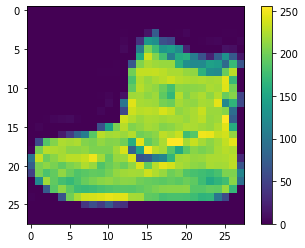

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Questi valori vanno scalati in un intervallo tra 0 e 1 prima di darli in pasto al modello della rete. Per fare ciò, si dividono i valorei per 255. E' importante che l'*insieme di addestramento* e l'*insieme di verifica* siano pre-elaborati nello stesso modo:

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Per verificare che i dati siano nella forma corretta e che tutto sia pronto per costruire e allenare la rete, visualizziamo le prime 25 immagini del  *insieme di addestramento* e visualizziamo il nome della classe sotto a ciascuna immagine.

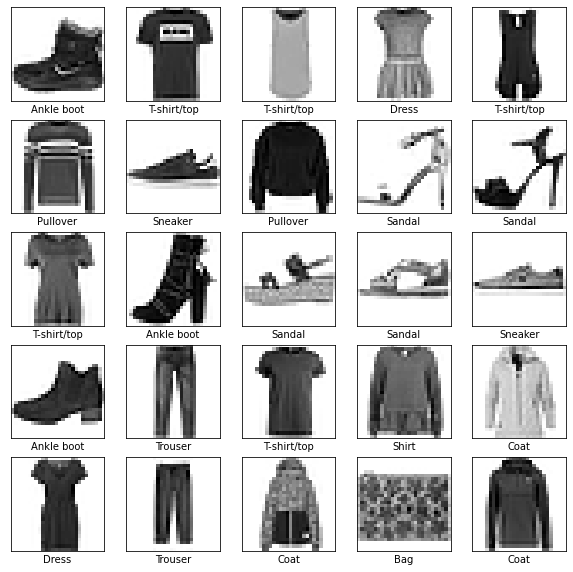

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Costruire il modello

La costruzione della rete neurale richiede di configurare i livelli del modello, quindi la compilazione del modello.

### Inizializzare i livelli

L'elemento costruttivo di base di una rete neurale è il *livello*. I livelli estraggono rappresentazioni dai dati con cui vengono alimentati. Sperabilmente, queste rappresentazioni sono significative per il problema che si sta trattando.

La maggior parte del deep learning consiste nel collegare tra loro livelli semplici. La maggior parte dei livelli, come `tf.keras.layers.Dense`, hanno parametri che sono imparati durante l'allenamento.

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Il primo livello in questa rete, `tf.keras.layers.Flatten`, trasforma il formato delle immagini da un array bi-dimensionale (di 28 per 28 pixel) in un array uni-dimensionale (di 28 * 28 = 784 pixel). Pensate a questi livelli come righe non impilate di pixel dell'immagine. Questo livello non ha parametri da imparare; esso si limita a rifirmattare i dati.

Dopo la normalizzazione dei pixel, la rete consiste di due livelli `tf.keras.layers.Dense`. Questi sono livelli neurali strettamente connessi, o completamente connessi. Il primo livello `Denso` ha 128 nodi (o neuroni). Il secondo (ed ultimo) livello è un livello *softmax* a 10 nodi che restituisce un vettore di 10 valori di probabilità la cui somma è 1. Ogni nodo contiene un valore che indica la probabilità che l'immagine corrente appartenga ad una delle 10 classi.

### Compilare il modello

Prima che il modello sia pronto per l'apprendimento, è necessaria qualche impostazione in più. Queste sono aggiunte durante i passi di *compilazione* del modello:

* *Funzione perdita* —Misura quanto è accurato il modello durante l'apprendimento. La volontà è di minimizzare questa funzione per "dirigere" il modello nella giusta direzione.
* *Ottimizzatore* —Indica com'è aggiornato il modello sulla base dei dati che tratta e della sua funzione perdita.
* *Metriche* —Usate per monitorare i passi di addestramento e verifica. L'esempio seguente usa come *accuratezza*, la frazione delle immagini che sono classificate correttamente.

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Addestrare il modello

L'addestramento del modello di rete neurale richiede i seguenti passi:

1. Alimentare il modello con i dati di addestramento. In questo esempio, i dati di addestramento sono nei vettori `train_images` e `train_labels`.
2. Il modello impara ad associare immagini ed etichette.
3. Chiedere al modello di fare previsioni su un insieme di prova—in questo esempio, il vettore `test_images`.
4. Verificare che le previsioni corrispondano alle etichette del vettore `test_labels`.
Per iniziare l'addestramento, chiamare il metodo `model.fit`—chiamato così perchè "allena" il modello sui dati di addestramento:

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5000 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3765 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3379 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3136 - accuracy: 0.8864
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2940 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2787 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2681 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2572 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2469 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.238

Mentre il modello si allena, vengono visualizzate le metriche di perdita e accuratezza. Questo modello raggiunge un'accuratezza di circa 0.88 (o 88%) sui dati di addestramento.

## Valutare l'accuratezza

Successivamente, valutare come si comporta il modello sul dataset di test:

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3317 - accuracy: 0.8844

Test accuracy: 0.8844000101089478


Per scoprire che l'accuratezza sul datase di test è leggermente inferiore rispetto a quella sul dataset di addestramento. Questa differenza tra l'accuratezza in addestramento e l'accuratezza in test rappresenta l' *overfitting*. L'overfitting è quando un modello di machine learning ha prestazioni peggiori su input nuovi, mai visti prima, che sui dati di addestramento.

## Fare previsioni

Una volta addestrato il modello, puoi usarlo per fare previsioni su altre immagini.

In [18]:
predictions = model.predict(test_images)

Qui, il modello ha previsto l'etichetta per ciascuna immagine nell'insieme di test. Diamo un'ochiata alla prima previsione:

In [19]:
predictions[0]

array([3.0491860e-09, 4.2379642e-09, 1.8019068e-12, 2.3943709e-12,
       1.9414300e-08, 4.0091103e-04, 3.5837371e-09, 6.5058367e-03,
       9.7386260e-07, 9.9309230e-01], dtype=float32)

Una prevsione è un vettore di 10 numeri. Essi rappresentano la "confidenza" del modello che l'immagine corrisponda a ciascuno dei 10 diversi articoli di abbigliamento. E si può vedere quale etichetta ha il valore più alto di confidenza:

In [20]:
np.argmax(predictions[0])

9

Così, il modello è più condidente che l'immagine sia uno stivaletto, o `class_names[9]`. L'esame dell'etichetta di test ostra che questa classificazione è corretta:

In [21]:
test_labels[0]

9

Mettendo ciò in forma grafica, si può osservare l'insieme completo delle previsioni sulle 10 classi.

In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Osserviamo la 0esima immagine, le previsioni, e il vettore delle previsioni. Le etichette previste correttamente sono in blu e le previsioni non corrette sono in rosso. Il numero da la percentuale (su 100) dell'etichetta prevista.

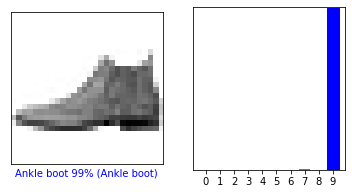

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

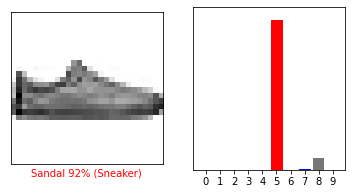

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

Rappresentiamo diverse immagini con le rispettive previsioni. Notiamo che il modello può sbagliare anche quando è molto confidente.

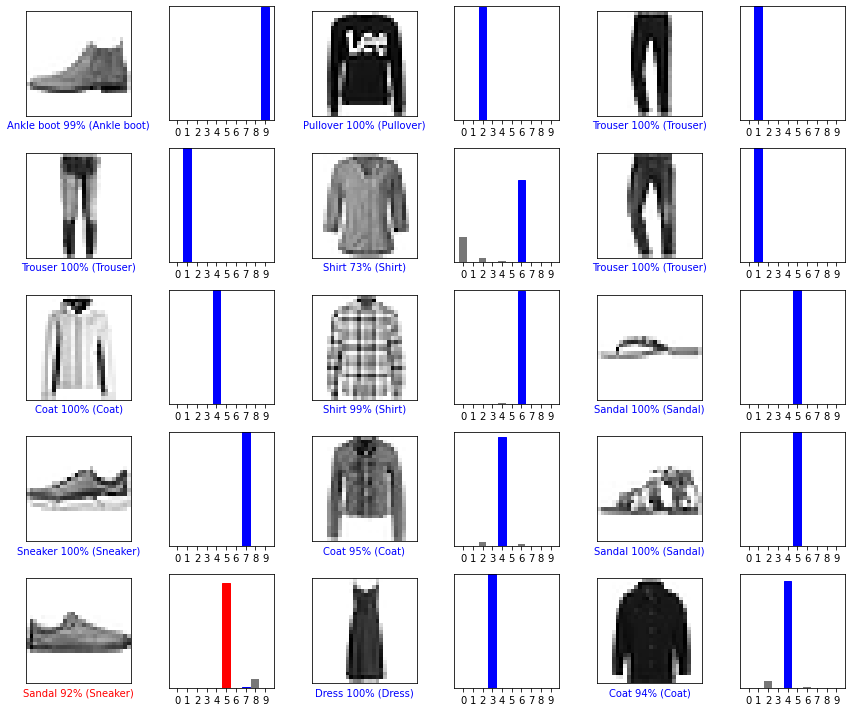

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Infine, usiamo il modello addestrato per fare una previsione su una singola immagine.

In [26]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


I modelli `tf.keras` sono ottimizzati per fare previsioni su *batch*, o collezioni, di esempi in una volta. Di conseguenza, anche se state usando una singola immagine, è necessario aggiungerla ad una lista:

In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Ed ora andiamo a prevedere l'etichetta corretta per questa immagine:

In [28]:
predictions_single = model.predict(img)

print(predictions_single)

[[9.3825176e-05 1.4355316e-11 9.9686265e-01 5.9839723e-11 2.7263623e-03
  1.0626238e-10 3.1675963e-04 4.4215223e-18 3.1750287e-07 8.4909911e-13]]


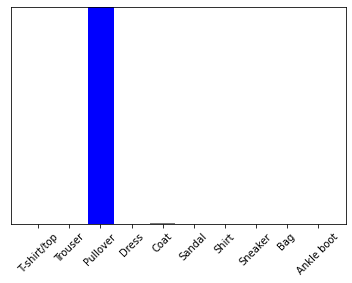

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` restituisce una lista di liste—una lista per ogni immagine nel batch di dati. Prendiamo la previsione per la nostra (unica) immagine nel batch:

In [30]:
np.argmax(predictions_single[0])

2

E il modello prevede l'etichetta secondo le aspettative.